In [1]:
import glob

import os
from config import RESULTS_DIR

checkpoint_dir = os.path.join(RESULTS_DIR, "checkpoints")

cur_dirs = [f for f in glob.glob(os.path.join(checkpoint_dir, "exp_*"))]
dir_name = os.path.join(checkpoint_dir, f"exp_{len(cur_dirs)}")
print(dir_name)
if not os.path.exists(dir_name):
    os.makedirs(dir_name)


/home/selim/Documents/VScodeProjects/rl-focal/results/checkpoints/exp_0


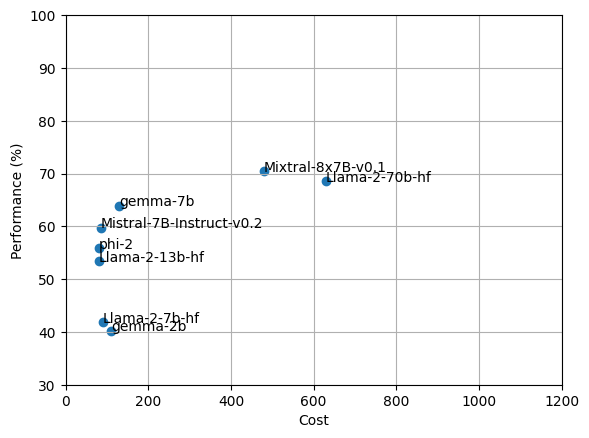

In [6]:
import numpy as np
import matplotlib.pyplot as plt


model_names = ['Llama-2-13b-hf', 'Llama-2-70b-hf', 'Llama-2-7b-hf', 'Mistral-7B-Instruct-v0.2', 'Mixtral-8x7B-v0.1', 'gemma-2b', 'gemma-7b', 'phi-2']
model_prices = np.array([0.08, 0.63, 0.09, 0.085, 0.48, 0.11, 0.13, 0.08]) * 1000
model_performances = [53.40, 68.53, 41.79, 59.67, 70.42, 40.26, 63.87, 55.82]

fig, ax = plt.subplots()
ax.scatter(model_prices, model_performances)
for i in range(len(model_names)):
    ax.text(model_prices[i], model_performances[i], model_names[i])
ax.grid()
ax.set_xlim(0, 1200)
ax.set_ylim(30, 100)
ax.set_xlabel("Cost")
ax.set_ylabel("Performance (%)")
plt.savefig("perf_cost_comp.png", dpi=200, bbox_inches="tight")
plt.show()



In [3]:
import numpy as np

train_scores = np.load("results/checkpoints/open_ended/train_scores.npy")
test_scores = np.load("results/checkpoints/open_ended/test_scores_end.npy")

print(train_scores.shape, test_scores.shape)

(1500, 3) (1409, 3)


In [5]:
test_scores

array([[1. , 1. , 0. ],
       [1. , 1. , 0. ],
       [0. , 0. , 0. ],
       ...,
       [0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5],
       [1. , 0.5, 0.5]])

In [6]:
print(np.mean(test_scores[:500], axis=0))
print(np.mean(test_scores[500:1000], axis=0))
print(np.mean(test_scores[1000:], axis=0))

[0.618 0.584 0.078]
[0.516 0.644 0.948]
[0.62591687 0.63814181 0.66748166]


In [107]:
from datasets import load_dataset
from config import hf_token
import numpy as np

all_model_data = {
    "meta-llama__Llama-2-70b-chat-hf": {},
    "mistralai__Mixtral-8x7B-Instruct-v0.1" : {},
    "google__gemma-7b": {},
    "microsoft__phi-2": {},
    "mistralai__Mistral-7B-v0.1": {},
}
model_names = list(all_model_data.keys())
ds_name = "gpqa_main"

data = load_dataset(
    f"HuggingFaceEvalInternal/{model_names[0]}-details-private",
    name=f"{model_names[0]}__leaderboard_{ds_name}",
    split="latest",
    token=hf_token)

idx = np.argsort(data["doc_id"])
probs = np.array(data["resps"]).squeeze()[:, :, 0].astype(float)
probs = F.softmax(torch.tensor(probs), dim=-1).numpy()
labels = np.array([data["doc"][i]["answer"] for i in range(len(idx))])

lbl_index = []
for lbl in labels:
    lbl_index.append(["(A)", "(B)", "(C)", "(D)"].index(lbl))
labels = np.array(lbl_index)

print(probs[idx], labels[idx])

[[0.0599314  0.77985878 0.14354793 0.01666188]
 [0.23417246 0.04071955 0.68101327 0.04409472]
 [0.14181434 0.08624474 0.75370238 0.01823855]
 ...
 [0.08615195 0.02471564 0.80541627 0.08371614]
 [0.11780906 0.0338577  0.8337442  0.01458904]
 [0.2940458  0.3588227  0.33773336 0.00939814]] [3 2 3 2 2 0 2 0 3 1 1 3 1 0 0 0 2 1 2 3 2 2 0 3 1 1 3 0 0 2 1 1 0 0 0 1 0
 3 0 1 2 1 1 2 1 1 3 1 0 0 0 1 3 2 0 1 2 0 1 3 1 0 3 2 1 3 2 1 2 1 1 3 0 2
 0 3 2 1 1 1 0 1 1 2 2 1 3 0 1 1 1 2 0 3 3 2 2 1 2 2 1 1 0 0 1 0 1 0 0 3 1
 0 0 1 2 0 1 0 3 3 2 3 2 3 0 1 0 2 3 0 1 3 1 0 0 1 2 3 3 2 1 0 1 2 1 0 2 3
 1 2 0 1 3 0 2 2 3 1 0 3 2 0 1 0 2 2 2 0 2 1 3 3 2 1 1 1 3 2 2 0 3 0 0 2 0
 0 1 0 1 0 0 3 2 0 1 1 0 0 2 1 0 1 2 3 2 3 3 2 2 3 3 3 0 1 1 3 3 2 2 1 0 3
 0 2 0 1 2 1 0 3 1 0 2 2 1 1 0 0 3 1 2 0 3 1 2 3 3 3 3 3 0 3 0 1 1 2 1 1 3
 3 3 2 1 2 3 3 2 1 0 2 1 0 1 0 3 3 1 2 1 1 1 2 2 0 3 1 2 1 1 1 1 1 2 3 0 3
 2 2 2 3 2 3 1 3 1 3 0 2 1 1 0 2 0 1 0 0 0 3 1 2 2 0 1 0 2 1 1 1 1 1 3 1 3
 1 2 2 0 0 0 1 0 2 2 1 2 1 3 0 3 3 1 

In [101]:
F.softmax(torch.tensor(probs), dim=-1)

tensor([0.0455, 0.7999, 0.1546], dtype=torch.float64)

In [88]:
import torch
import torch.nn.functional as F

for rep in data["resps"]:
    responses = np.array(rep).squeeze()[:, 0].astype(float)
    probs = F.softmax(torch.tensor(responses), dim=-1)
    num_zeros = 5 - len(probs)
    if num_zeros > 0:
        probs = torch.cat([probs, torch.zeros(num_zeros)])
    probs = probs.numpy()
    print(probs)

[0.01781529 0.68858211 0.29360259 0.         0.        ]
[0.0074093  0.68704871 0.30554199 0.         0.        ]
[0.02150105 0.66603662 0.31246233 0.         0.        ]
[0.04402439 0.65013502 0.30584059 0.         0.        ]
[0.20035481 0.23975124 0.0035433  0.55635065 0.        ]
[0.33937639 0.27923157 0.00105397 0.38033807 0.        ]
[0.22159358 0.23286946 0.01496137 0.53057559 0.        ]
[0.24188977 0.23354516 0.01039192 0.51417314 0.        ]
[0.05486465 0.00095722 0.94417814 0.         0.        ]
[0.06015552 0.00464755 0.93519693 0.         0.        ]
[0.12323996 0.06044817 0.81631187 0.         0.        ]
[0.19418538 0.05196152 0.7538531  0.         0.        ]
[0.49738074 0.03957137 0.29600201 0.16704588 0.        ]
[4.42660786e-02 1.50835200e-05 7.10482972e-01 2.45235866e-01
 0.00000000e+00]
[3.43878564e-01 3.23531887e-04 3.83265892e-01 2.72532012e-01
 0.00000000e+00]
[0.55140377 0.00603057 0.25346908 0.18909657 0.        ]
[1.71956534e-01 6.56463123e-04 2.43977541e-01 

In [83]:
np.array([data["doc"][i]["answer_index"] for i in range(len(probs))])

array([1, 0, 2, 0, 0, 1, 3, 3, 0, 2, 1, 2, 1, 2, 3, 1, 0, 2, 1, 0, 3, 2,
       3, 2, 1, 2, 0, 4, 2, 2, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 1, 3, 1, 2,
       2, 3, 1, 0, 3, 1, 2, 1, 0, 2, 1, 3, 3, 1, 3, 4, 1, 1, 3, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 0, 2, 0, 2, 3, 3, 2, 0, 4, 2,
       1, 3, 0, 3, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 3, 2, 3,
       2, 0, 3, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 3, 1, 0, 1, 1, 2, 0,
       2, 1, 1, 1, 1, 0, 1, 0, 3, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 3,
       0, 2, 0, 4, 3, 0, 1, 0, 0, 1, 1, 2, 1, 2, 4, 0, 1, 2, 0, 0, 1, 1,
       1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 3, 2, 0, 3, 0, 1,
       0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 3, 2, 0, 2, 1, 2, 0, 4, 2, 0, 1, 0,
       4, 0, 3, 4, 1, 3, 3, 1, 2, 0, 2, 1, 3, 2, 2, 3, 3, 0, 3, 0, 4, 2,
       0, 2, 1, 2, 1, 0, 2, 1])

In [25]:
["(A)", "(B)", "(C)", "(D)"].index(labels[0])

3

In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from config import RESULTS_DIR
from run import load_arr


checkpoint_dir = os.path.join(RESULTS_DIR, "checkpoints", "keep")
select_agent_list = []
ens_agent_list = []
for file_dir in glob.glob(f"{checkpoint_dir}/*"):
    ens_agent_path = os.path.join(file_dir, "train_ens_agent_rewards.npy")
    select_agent_path = os.path.join(file_dir, "train_select_agent_rewards.npy")
    if os.path.exists(select_agent_path):
        select_agent_list.append(load_arr(select_agent_path))
        ens_agent_list.append(load_arr(ens_agent_path))

# select_agent_arr = np.stack(select_agent_list)
# ens_agent_arr = np.stack(ens_agent_list)

# print(select_agent_arr.shape, ens_agent_arr.shape)
# fig, ax = plt.subplots()


In [3]:
for i in select_agent_list:
    print(i.shape)

(25,)
(25,)
(25,)
(18,)
(25,)
(25,)
(25,)
(25,)
(1,)
(11,)


In [2]:
import numpy as np


a = [97.6, 71.43, 55.84, 68.09, 65.96, 8.51, 48.94, 43.65, 36.55, 60.91, 73.60, 55.32, 4.26, 50.44, 45.69, 51.78, 43.65, 54.55, 87.23, 23.40, 10.64, 8.51, 38.30, 42.55]
np.mean(a)

47.80833333333334

In [4]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
np.mean([a, b], axis=0)

array([1.5, 2.5, 3.5])

In [3]:
def fix_arr(in_list):
    new_arr_list = []
    max_size = max([len(arr) for arr in in_list])
    for input_arr in in_list:
        if len(input_arr) > 0:
            pad_size = max_size - len(input_arr)
            if pad_size > 0:
                pad_arr = np.empty(pad_size)
                pad_arr[:] = np.nan
                new_arr = np.concatenate([input_arr, pad_arr]) 
            else:
                new_arr = input_arr
            new_arr_list.append(new_arr)
    return np.stack(new_arr_list)
    

In [5]:
select_agent_arr = fix_arr(select_agent_list)
ens_agent_arr = fix_arr(ens_agent_list)

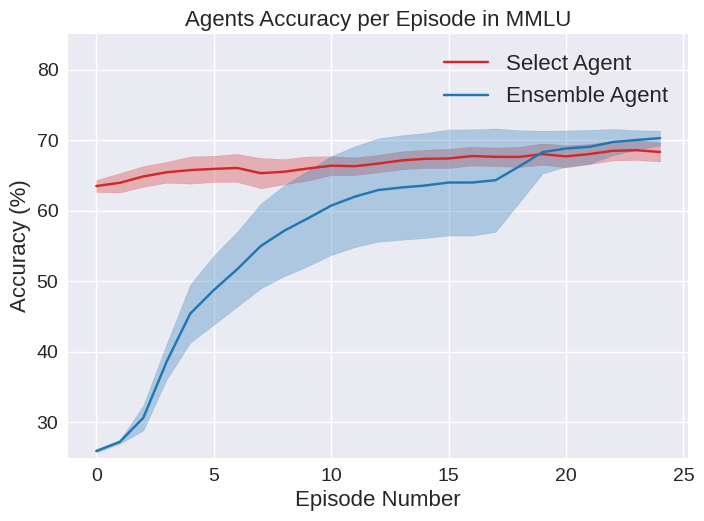

In [46]:
plt.style.use('seaborn-v0_8')

# Set global font size for all elements
plt.rcParams.update({
    'font.size': 14,              # General font size
    'axes.titlesize': 16,         # Title font size
    'axes.labelsize': 16,         # Axis label font size
    'xtick.labelsize': 14,        # X-axis tick font size
    'ytick.labelsize': 14,        # Y-axis tick font size
    'legend.fontsize': 14         # Legend font size
})

fig, ax = plt.subplots()

line_names = ["Select Agent", "Ensemble Agent"]
colors  = ["tab:red", "tab:blue"]
for i, arr in enumerate([select_agent_arr, ens_agent_arr]):
    mu = np.nanmean(arr, axis=0)
    sigma = np.nanstd(arr, axis=0)
    x_axis = np.arange(len(mu))
    ax.plot(x_axis, mu, color=colors[i], label=line_names[i])
    ax.fill_between(x_axis, mu + 0.5 * sigma, mu - 0.5 * sigma, color=colors[i], alpha=0.3)
ax.set_ylim(25, 85)
ax.legend(fontsize=16)
ax.set_xlabel("Episode Number")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Agents Accuracy per Episode in MMLU")
plt.savefig("results/figures/reward_plot.png", dpi=200, bbox_inches="tight")



In [14]:
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [16]:
np.nanmean(select_agent_arr)

array([63.49408059, 63.94808298, 64.84739872, 65.44259802, 65.75323124,
       65.91940915, 66.05083089, 65.31334854, 65.52079939, 65.97045726,
       66.37558379, 66.30009775, 66.66911046, 67.12365591, 67.34726295,
       67.3985826 , 67.73460411, 67.62829912, 67.61765117, 68.01284737,
       67.69724899, 68.02820835, 68.48484848, 68.56584276, 68.31727412])

In [25]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']